#### This notebook is based both on a notebook written by Arpit Jain for the Follette-Lab MinM's project, directed by Kim Ward-Duong, and a tutorial by Jake Vanderplas (https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

#### This edition was edited by William Balmer to map the GAPlanetS target list 

In [32]:
#import statements
import numpy as np
import pandas as pd
import astropy as ast
from astropy.coordinates import SkyCoord 
import matplotlib as mpl
from matplotlib import animation
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
#import GAIA DR2 data into pandas frame
data = pd.read_csv('GAPlanetS_TDD_GAIA-BANYANSIGMA.csv')

In [3]:
#create smaller pandas frame with only information needed for this notebook
data2 = pd.concat([data['Name'],data['RA'],data['Dec'],data['Distance (calc)'],data['Spectral Type']],axis=1)

In [4]:
ra = data2['RA'].to_numpy()
ra = ra.flatten()
dec = data2['Dec'].to_numpy()
dec = dec.flatten()
d = data2['Distance (calc)'].to_numpy()
d = d.flatten()
spectral = data2['Spectral Type'].to_numpy()
spectral = spectral.flatten()

In [22]:
#empty arrays to be appended to later
x = []
y = []
z = []
spect = []

#creates a dictionary to match the spectral types to numbers, for the purposes of the maps color bars etc
dicti = {'A0':-19,'A2':-17,'A8':-11,'A9':-10,'F0':-9,'F1':-8,'F6':-3,'F8':-1,'K0':11,'K1':12,'K2':13,'K5':16,'K7':18}
    
labels = ['A0','A2','A8','A9','F0','F1','F6','F8','K0','K1','K2','K5','K7']

In [23]:
for ii in range(0,len(ra)):
    #This for loop takes the data from the redecd file and changes it to cartersian coodinates so that our plot can have the Sun at the center of the plot
    c = SkyCoord(ra=ra[ii]*ast.units.degree, dec = dec[ii]*ast.units.degree, distance=d[ii]*ast.units.pc)
    x.append(c.cartesian.x.value)
    y.append(c.cartesian.y.value)
    z.append(c.cartesian.z.value)

In [24]:
for i in range(len(spectral)):
    #The purpose of this for loop is to convert the spectral types of the targets to numbers and append to an empty array
    conversion = dicti.get(spectral[i])
    spect.append(conversion)

<IPython.core.display.Javascript object>


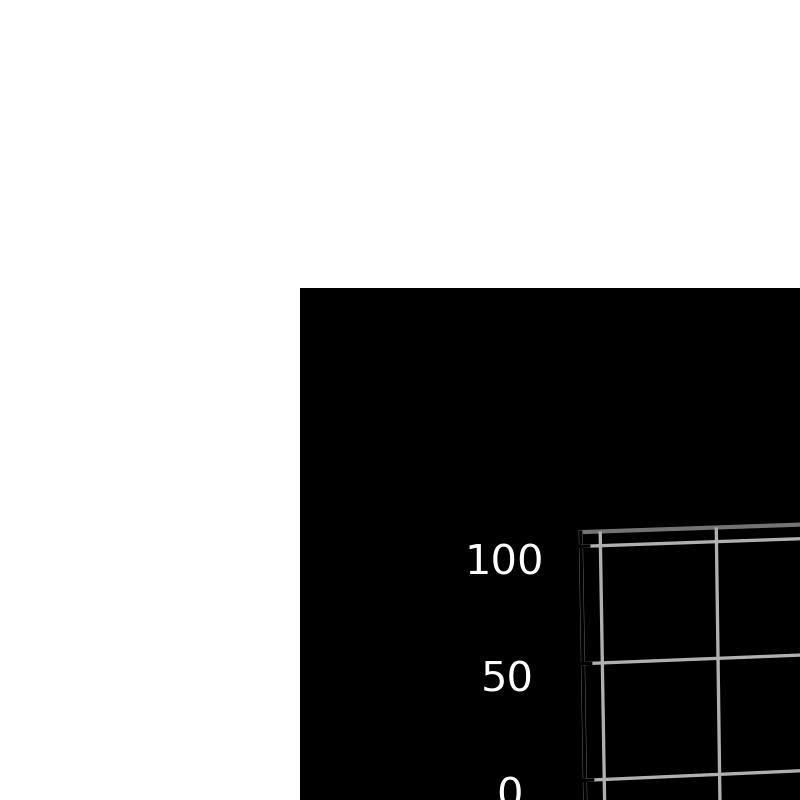

In [71]:
#Plotting the 3D figure here
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

color = [] #Setting up an empty array for the color values to be set to 

cm = plt.get_cmap("Spectral_r")

#Plotting
p = ax.scatter3D(x,y,z, cmap=cm, c=spect)
ax.scatter(0,0,0, color ='xkcd:mustard',label = 'Sun', marker='*', edgecolors='k', s=90) #plots the sun
plt.legend()
ax.set_facecolor('k')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zlim(-190,100)
ax.set_xlabel('x (pc)')
ax.set_ylabel('y (pc)')
ax.set_zlabel('z (pc)')

ax.tick_params(axis='x', colors='#ffffff')
ax.tick_params(axis='y', colors='#ffffff')
ax.tick_params(axis='z', colors='#ffffff')

ax.xaxis.label.set_color('#ffffff')
ax.yaxis.label.set_color('#ffffff')
ax.zaxis.label.set_color('#ffffff')

cbar = fig.colorbar(p, ticks=[-19,-17,-11,-10,-9,-8,-3,-1,11,12,13,16,18], orientation='horizontal')
cbar.ax.set_xticklabels(labels)  # horizontal colorbar
plt.show()

In [72]:
def init():
    p = ax.scatter3D(x,y,z, cmap=cm, c=spect)
    ax.set_xlim(-200,200)
    ax.set_ylim(-200,400)
    return fig,

def animate(i):
    ax.view_init(elev=10, azim=i)
    #ax.set_xlim(-1*i,1*i) these will allow the animation to 'spiral outwards'
    #ax.set_ylim(-1*i,1*i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])